In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('downloads\\ballot_measure_poll.csv')
df.shape
df.head

<bound method NDFrame.head of       voter_id support_initiative region    county         education  \
0            0                yes   west   duchess  college_graduate   
1            1                yes   west   duchess  college_graduate   
2            2                yes   east  llandilo  college_graduate   
3            3                 no   east      cuya  college_graduate   
4            4                 no   east      cuya  college_graduate   
...        ...                ...    ...       ...               ...   
1094      1094                yes   east      cuya       high_school   
1095      1095                 no  south      cuya       high_school   
1096      1096                 no  north    angelo  college_graduate   
1097      1097                yes  south      cuya      some_college   
1098      1098                yes   east      cuya  college_graduate   

               ses ethnicity      ideology kids  authoritarianism_score  ...  \
0          mid_ses    rac

In [2]:
pd.pivot_table(df, values='voter_id', index='support_initiative', columns='education',aggfunc=pd.Series.nunique, margins=True,margins_name='Total')

education,college_graduate,high_school,post_graduate,some_college,Total
support_initiative,,,,,
dont_know,18,14,4,22,58
no,94,50,62,117,323
yes,223,97,183,215,718
Total,335,161,249,354,1099


In [3]:
pd.pivot_table(df, values='voter_id', index='support_initiative', columns='ses',aggfunc=pd.Series.nunique, margins=True,margins_name='Total')

ses,dont_know,low_ses,mid_ses,very_wealthy,wealthy,Total
support_initiative,,,,,,
dont_know,20,6,17,4,11,58
no,71,25,83,57,87,323
yes,96,89,244,93,196,718
Total,187,120,344,154,294,1099


In [4]:
pd.pivot_table(df, values='voter_id', index='support_initiative', columns='ethnicity',aggfunc=pd.Series.nunique, margins=True,margins_name='Total')

ethnicity,race_A,race_B,race_c,Total
support_initiative,,,,
dont_know,44,5,9,58
no,258,36,29,323
yes,545,108,65,718
Total,847,149,103,1099


In [5]:
pd.pivot_table(df, values='voter_id', index='support_initiative', columns='ideology',aggfunc=pd.Series.nunique, margins=True,margins_name='Total')

ideology,conservative,dont_know,liberal,moderate,Total
support_initiative,,,,,
dont_know,26,7,7,18,58
no,207,11,15,90,323
yes,165,36,220,297,718
Total,398,54,242,405,1099


In [6]:
pd.pivot_table(df, values='voter_id', index='support_initiative', columns='kids',aggfunc=pd.Series.nunique, margins=True,margins_name='Total')

kids,dont_know,no,yes,Total
support_initiative,,,,
dont_know,1,41,16,58
no,3,236,84,323
yes,2,526,190,718
Total,6,803,290,1099


In [7]:
df.dropna(thresh = 10,inplace=True)
df.isnull().sum()

voter_id                        0
support_initiative              0
region                          0
county                          0
education                       0
ses                             0
ethnicity                       0
ideology                        0
kids                            0
authoritarianism_score          0
taxes_score                     0
guns_score                      0
healthcare_score                0
immigrants_score                0
poor_score                      0
environmentalism_score          4
trust_in_institutions_score     0
economic_populism_score         0
military_score                  0
regulation_score                0
traditionalism_score            0
compassion_score                0
free_trade_score                0
globalism_score                 0
healthcare_women_score          0
populism_score                  0
presidential_score             91
racial_resentment_score         0
religious_freedom_score         0
dtype: int64

In [25]:
df.dropna(subset=['environmentalism_score','presidential_score'],inplace=True)
df.isnull().sum()

voter_id                       0
support_initiative             0
region                         0
county                         0
education                      0
ses                            0
ethnicity                      0
ideology                       0
kids                           0
authoritarianism_score         0
taxes_score                    0
guns_score                     0
healthcare_score               0
immigrants_score               0
poor_score                     0
environmentalism_score         0
trust_in_institutions_score    0
economic_populism_score        0
military_score                 0
regulation_score               0
traditionalism_score           0
compassion_score               0
free_trade_score               0
globalism_score                0
healthcare_women_score         0
populism_score                 0
presidential_score             0
racial_resentment_score        0
religious_freedom_score        0
support                        0
dtype: int

In [26]:
df.groupby('support_initiative')['authoritarianism_score','taxes_score','guns_score','healthcare_score','immigrants_score','poor_score','environmentalism_score','trust_in_institutions_score','economic_populism_score','military_score','regulation_score','traditionalism_score','compassion_score','free_trade_score','globalism_score','healthcare_women_score','populism_score','presidential_score','racial_resentment_score','religious_freedom_score'].mean()

C:\Users\laura\AppData\Local\Temp/ipykernel_17860/1028938313.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('support_initiative')['authoritarianism_score','taxes_score','guns_score','healthcare_score','immigrants_score','poor_score','environmentalism_score','trust_in_institutions_score','economic_populism_score','military_score','regulation_score','traditionalism_score','compassion_score','free_trade_score','globalism_score','healthcare_women_score','populism_score','presidential_score','racial_resentment_score','religious_freedom_score'].mean()


,authoritarianism_score,taxes_score,guns_score,healthcare_score,immigrants_score,poor_score,environmentalism_score,trust_in_institutions_score,economic_populism_score,military_score,regulation_score,traditionalism_score,compassion_score,free_trade_score,globalism_score,healthcare_women_score,populism_score,presidential_score,racial_resentment_score,religious_freedom_score
support_initiative,,,,,,,,,,,,,,,,,,,,
dont_know,75.692308,37.692308,48.269231,36.500000,35.500000,37.750000,53.500000,46.019231,33.230769,57.326923,57.076923,50.846154,51.057692,40.519231,44.307692,48.269231,33.423077,51.346154,69.865385,51.269231
no,77.010601,36.459364,48.745583,32.455830,31.996466,35.522968,54.063604,46.000000,29.180212,59.643110,57.773852,52.374558,48.805654,39.194346,42.038869,45.236749,32.318021,55.809187,73.494700,52.724382
yes,73.324675,40.327922,43.019481,39.048701,38.620130,40.959416,52.741883,46.000000,36.340909,54.107143,58.159091,48.470779,55.603896,39.431818,44.084416,51.728896,31.740260,37.152597,66.990260,48.654221


In [9]:
df.groupby('support_initiative')['authoritarianism_score','taxes_score','guns_score','healthcare_score','immigrants_score','poor_score','environmentalism_score','trust_in_institutions_score','economic_populism_score','military_score','regulation_score','traditionalism_score','compassion_score','free_trade_score','globalism_score','healthcare_women_score','populism_score','presidential_score','racial_resentment_score','religious_freedom_score'].std()

C:\Users\laura\AppData\Local\Temp/ipykernel_17860/3483312383.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('support_initiative')['authoritarianism_score','taxes_score','guns_score','healthcare_score','immigrants_score','poor_score','environmentalism_score','trust_in_institutions_score','economic_populism_score','military_score','regulation_score','traditionalism_score','compassion_score','free_trade_score','globalism_score','healthcare_women_score','populism_score','presidential_score','racial_resentment_score','religious_freedom_score'].std()


,authoritarianism_score,taxes_score,guns_score,healthcare_score,immigrants_score,poor_score,environmentalism_score,trust_in_institutions_score,economic_populism_score,military_score,regulation_score,traditionalism_score,compassion_score,free_trade_score,globalism_score,healthcare_women_score,populism_score,presidential_score,racial_resentment_score,religious_freedom_score
support_initiative,,,,,,,,,,,,,,,,,,,,
dont_know,4.980287,7.175826,11.918610,12.665249,11.940275,10.336203,2.187771,0.132453,12.331521,8.834776,6.107485,7.124211,10.173433,7.100690,7.847106,11.250508,7.497911,24.127833,10.013900,7.241969
no,5.179156,6.040882,11.255162,10.389963,10.875281,8.961076,1.932397,0.351852,10.535915,7.651277,5.083022,6.477378,8.514084,6.481936,6.505311,9.629699,6.397007,22.507879,7.948861,6.192523
yes,5.554146,7.276537,12.308644,11.971905,13.360636,9.518693,2.099079,0.342431,11.126027,8.248185,5.898474,7.058364,9.560955,7.564398,7.862567,10.010682,7.946666,22.701856,9.978203,7.375223


Text(0, 0.5, 'immigrant score')

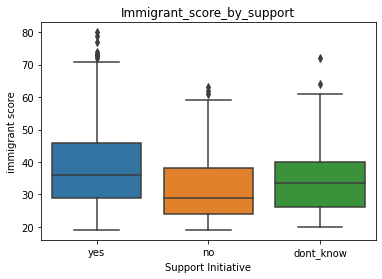

In [27]:
sns.boxplot(x='support_initiative', y='immigrants_score', data=df).set(title='Immigrant_score_by_support')

#modify axis labels
plt.xlabel('Support Initiative')
plt.ylabel('immigrant score')

Text(0, 0.5, 'authoritarianism score')

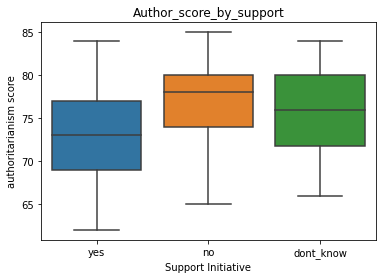

In [28]:
sns.boxplot(x='support_initiative', y='authoritarianism_score', data=df).set(title='Author_score_by_support')

#modify axis labels
plt.xlabel('Support Initiative')
plt.ylabel('authoritarianism score')

Text(0, 0.5, 'tax score')

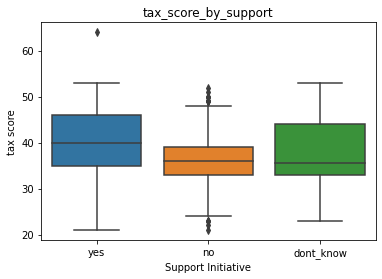

In [29]:
sns.boxplot(x='support_initiative', y='taxes_score', data=df).set(title='tax_score_by_support')

#modify axis labels
plt.xlabel('Support Initiative')
plt.ylabel('tax score')

Text(0, 0.5, 'gun score')

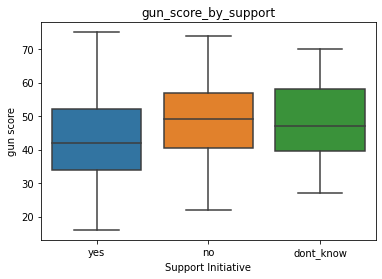

In [30]:
sns.boxplot(x='support_initiative', y='guns_score', data=df).set(title='gun_score_by_support')

#modify axis labels
plt.xlabel('Support Initiative')
plt.ylabel('gun score')

Text(0, 0.5, 'healthcare score')

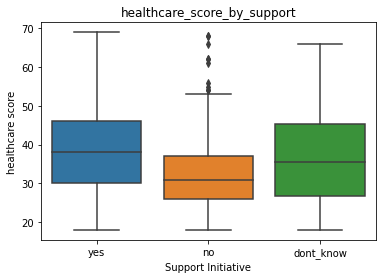

In [31]:
sns.boxplot(x='support_initiative', y='healthcare_score', data=df).set(title='healthcare_score_by_support')

#modify axis labels
plt.xlabel('Support Initiative')
plt.ylabel('healthcare score')

Text(0, 0.5, 'poor score')

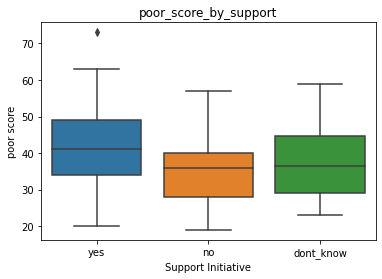

In [32]:
sns.boxplot(x='support_initiative', y='poor_score', data=df).set(title='poor_score_by_support')

#modify axis labels
plt.xlabel('Support Initiative')
plt.ylabel('poor score')

Text(0, 0.5, 'econ score')

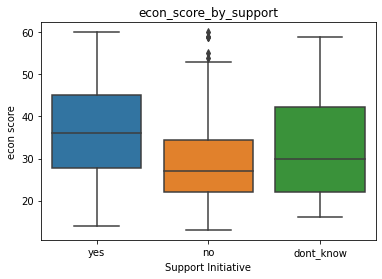

In [33]:
sns.boxplot(x='support_initiative', y='economic_populism_score', data=df).set(title='econ_score_by_support')

#modify axis labels
plt.xlabel('Support Initiative')
plt.ylabel('econ score')

In [34]:
newdf = df[(df.support_initiative == "yes")]
newdf.shape

(616, 30)

In [35]:
pd.set_option('display.max_columns', None)
np.round(newdf.describe(),2)

,voter_id,authoritarianism_score,taxes_score,guns_score,healthcare_score,immigrants_score,poor_score,environmentalism_score,trust_in_institutions_score,economic_populism_score,military_score,regulation_score,traditionalism_score,compassion_score,free_trade_score,globalism_score,healthcare_women_score,populism_score,presidential_score,racial_resentment_score,religious_freedom_score,support
count,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.00,616.0
mean,555.46,73.32,40.33,43.02,39.05,38.62,40.96,52.74,46.00,36.34,54.11,58.16,48.47,55.60,39.43,44.08,51.73,31.74,37.15,66.99,48.65,1.0
std,313.29,5.10,6.83,12.34,11.28,12.18,9.24,2.10,0.06,10.91,8.16,5.57,6.83,9.48,7.15,7.40,9.89,7.33,22.75,9.54,7.32,0.0
min,0.00,62.00,21.00,16.00,18.00,19.00,20.00,48.00,45.00,14.00,37.00,41.00,31.00,31.00,19.00,27.00,28.00,19.00,6.00,35.00,34.00,1.0
25%,280.75,69.00,35.00,34.00,30.00,29.00,34.00,51.00,46.00,27.75,48.00,55.00,44.00,47.00,34.00,38.00,44.00,26.00,20.00,60.00,43.00,1.0
50%,573.00,73.00,40.00,42.00,38.00,36.00,41.00,53.00,46.00,36.00,54.00,59.00,48.00,57.50,38.00,43.00,52.50,30.00,26.00,67.00,49.00,1.0
75%,822.25,77.00,46.00,52.00,46.25,46.00,49.00,54.00,46.00,45.00,60.00,62.00,53.00,64.00,44.00,49.00,59.00,36.00,64.00,75.00,54.00,1.0
max,1098.00,84.00,64.00,75.00,69.00,80.00,73.00,59.00,47.00,60.00,75.00,69.00,67.00,71.00,65.00,67.00,73.00,56.00,80.00,84.00,70.00,1.0


In [36]:
pd.set_option('display.max_columns', None)
np.round(newdf.corr(),2)

,voter_id,authoritarianism_score,taxes_score,guns_score,healthcare_score,immigrants_score,poor_score,environmentalism_score,trust_in_institutions_score,economic_populism_score,military_score,regulation_score,traditionalism_score,compassion_score,free_trade_score,globalism_score,healthcare_women_score,populism_score,presidential_score,racial_resentment_score,religious_freedom_score,support
voter_id,1.00,0.03,0.03,-0.12,0.01,-0.02,0.03,0.02,-0.02,-0.01,0.01,0.05,0.05,0.03,-0.11,-0.02,0.00,-0.04,-0.03,-0.00,-0.01,NaN
authoritarianism_score,0.03,1.00,-0.55,0.19,-0.55,-0.55,-0.55,0.74,-0.00,-0.56,0.85,0.14,0.82,-0.73,-0.13,-0.25,-0.65,0.13,0.63,0.69,0.61,NaN
taxes_score,0.03,-0.55,1.00,-0.52,0.39,-0.06,0.79,-0.66,-0.10,0.37,-0.62,0.47,-0.60,0.84,-0.56,-0.37,0.59,-0.68,-0.41,-0.24,-0.85,NaN
guns_score,-0.12,0.19,-0.52,1.00,-0.25,-0.15,-0.43,0.33,0.03,-0.27,0.25,-0.63,0.12,-0.52,0.46,0.15,-0.35,0.44,0.42,0.25,0.43,NaN
healthcare_score,0.01,-0.55,0.39,-0.25,1.00,0.78,0.52,-0.80,0.08,0.85,-0.78,-0.37,-0.72,0.63,0.39,0.63,0.87,0.26,-0.62,-0.86,-0.60,NaN
immigrants_score,-0.02,-0.55,-0.06,-0.15,0.78,1.00,0.15,-0.52,0.10,0.68,-0.57,-0.52,-0.50,0.29,0.71,0.85,0.58,0.56,-0.62,-0.87,-0.23,NaN
poor_score,0.03,-0.55,0.79,-0.43,0.52,0.15,1.00,-0.54,-0.07,0.67,-0.59,0.31,-0.46,0.88,-0.36,0.03,0.66,-0.27,-0.55,-0.48,-0.54,NaN
environmentalism_score,0.02,0.74,-0.66,0.33,-0.80,-0.52,-0.54,1.00,-0.12,-0.66,0.92,0.11,0.90,-0.77,-0.11,-0.24,-0.90,0.21,0.57,0.67,0.85,NaN
trust_in_institutions_score,-0.02,-0.00,-0.10,0.03,0.08,0.10,-0.07,-0.12,1.00,0.07,-0.07,-0.03,-0.07,0.06,0.12,0.15,0.07,0.07,-0.07,-0.13,-0.03,NaN
economic_populism_score,-0.01,-0.56,0.37,-0.27,0.85,0.68,0.67,-0.66,0.07,1.00,-0.69,-0.25,-0.51,0.67,0.31,0.65,0.84,0.30,-0.74,-0.84,-0.39,NaN


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import logit

In [38]:
df

,voter_id,support_initiative,region,county,education,ses,ethnicity,ideology,kids,authoritarianism_score,taxes_score,guns_score,healthcare_score,immigrants_score,poor_score,environmentalism_score,trust_in_institutions_score,economic_populism_score,military_score,regulation_score,traditionalism_score,compassion_score,free_trade_score,globalism_score,healthcare_women_score,populism_score,presidential_score,racial_resentment_score,religious_freedom_score,support
0,0,yes,west,duchess,college_graduate,mid_ses,race_A,moderate,yes,69.0,50.0,39.0,62.0,50.0,51.0,49.0,46.0,54.0,40.0,54.0,38.0,66.0,42.0,49.0,71.0,31.0,15.0,55.0,36.0,1
2,2,yes,east,llandilo,college_graduate,wealthy,race_B,liberal,yes,73.0,34.0,44.0,35.0,50.0,38.0,54.0,46.0,40.0,56.0,60.0,52.0,50.0,48.0,49.0,51.0,37.0,13.0,67.0,57.0,1
3,3,no,east,cuya,college_graduate,wealthy,race_A,conservative,yes,77.0,34.0,60.0,28.0,32.0,26.0,53.0,46.0,23.0,57.0,56.0,49.0,43.0,46.0,40.0,41.0,30.0,71.0,77.0,52.0,2
4,4,no,east,cuya,college_graduate,very_wealthy,race_A,conservative,yes,76.0,34.0,69.0,32.0,26.0,35.0,53.0,46.0,29.0,59.0,51.0,47.0,50.0,40.0,42.0,43.0,37.0,76.0,75.0,55.0,2
5,5,yes,west,cuya,some_college,wealthy,race_A,moderate,no,76.0,42.0,42.0,31.0,26.0,37.0,53.0,46.0,31.0,60.0,62.0,55.0,52.0,30.0,38.0,44.0,30.0,25.0,78.0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1093,no,west,cuya,some_college,mid_ses,race_A,conservative,no,80.0,35.0,39.0,31.0,28.0,35.0,55.0,46.0,27.0,63.0,57.0,56.0,47.0,36.0,43.0,45.0,30.0,68.0,75.0,53.0,2
1094,1094,yes,east,cuya,high_school,mid_ses,race_A,dont_know,yes,78.0,31.0,72.0,34.0,35.0,25.0,54.0,46.0,29.0,59.0,48.0,51.0,38.0,51.0,48.0,43.0,40.0,31.0,73.0,55.0,1
1096,1096,no,north,angelo,college_graduate,wealthy,race_A,moderate,yes,81.0,33.0,64.0,23.0,22.0,30.0,56.0,46.0,23.0,65.0,59.0,56.0,40.0,42.0,37.0,40.0,32.0,68.0,83.0,59.0,2
1097,1097,yes,south,cuya,some_college,mid_ses,race_A,conservative,no,81.0,32.0,62.0,18.0,23.0,31.0,58.0,46.0,21.0,73.0,57.0,62.0,39.0,39.0,39.0,28.0,36.0,32.0,81.0,61.0,1


In [39]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [40]:
def Classification(support_initiative):
    if support_initiative == 'yes':
        return 1
    elif support_initiative == 'no':
        return 2
    elif support_initiative == 'dont_know':
        return 3

    
df['support']=df['support_initiative'].apply(Classification)
print(df['support'])

0       1
2       1
3       2
4       2
5       1
       ..
1093    2
1094    1
1096    2
1097    1
1098    1
Name: support, Length: 951, dtype: int64


In [41]:
X = df.drop(['support_initiative', 'support','voter_id','region','county','education','ses','ethnicity','ideology','kids'], axis=1) 
y = df['support']

print(list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['authoritarianism_score', 'taxes_score', 'guns_score', 'healthcare_score', 'immigrants_score', 'poor_score', 'environmentalism_score', 'trust_in_institutions_score', 'economic_populism_score', 'military_score', 'regulation_score', 'traditionalism_score', 'compassion_score', 'free_trade_score', 'globalism_score', 'healthcare_women_score', 'populism_score', 'presidential_score', 'racial_resentment_score', 'religious_freedom_score']
(760, 20)
(191, 20)
(760,)
(191,)


In [43]:
from sklearn.linear_model import LogisticRegressionCV
logmodel = LogisticRegressionCV()
logmodel.fit(X_train, y_train)

C:\Users\laura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\laura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV()